In [1]:
# import libraries for reading data
import pandas as pd
import matplotlib.pyplot as plt
import os
from PIL import Image

In [2]:
# data paths
train1_images_path = "/datasets/multi-view-pig-posture-recognition/train1_images"
train2_images_path = "/datasets/multi-view-pig-posture-recognition/train2_images"
test_images_path = "/datasets/multi-view-pig-posture-recognition/test_images"

# csv path with row_id, image_id, width, height, bbox, class_id
train1_csv_path = "/datasets/multi-view-pig-posture-recognition/train1.csv"
train2_csv_path = "/datasets/multi-view-pig-posture-recognition/train2.csv"
test_csv_path = "/datasets/multi-view-pig-posture-recognition/test.csv"

# txt file path
pig_posture_txt = "/datasets/multi-view-pig-posture-recognition/pig_posture_classes.txt"

In [13]:
# read all files and show statistics and content of csv files, column names etc.
# read csv files
train1_df = pd.read_csv(train1_csv_path)
train2_df = pd.read_csv(train2_csv_path)
test_df = pd.read_csv(test_csv_path)

# show column names of csv files
print("\nTrain1 CSV Columns:")
print(train1_df.columns)
print("\nTrain2 CSV Columns:")
print(train2_df.columns)
print("\nTest CSV Columns:")
print(test_df.columns)

# show content of txt file
with open(pig_posture_txt, 'r') as f:
    pig_posture_content = f.read()

# show numbers of unique image_ids, row_ids in train1, train2 and test csv files
print("\nNumber of unique image_ids in Train1 CSV:", train1_df['image_id'].nunique())
print("Number of unique image_ids in Train2 CSV:", train2_df['image_id'].nunique())
print("Number of unique row_ids in Train1 CSV:", train1_df['row_id'].nunique())
print("Number of unique row_ids in Train2 CSV:", train2_df['row_id'].nunique())
print("\nPig Posture Classes:")
print(pig_posture_content)




Train1 CSV Columns:
Index(['row_id', 'image_id', 'width', 'height', 'bbox', 'class_id'], dtype='object')

Train2 CSV Columns:
Index(['row_id', 'image_id', 'width', 'height', 'bbox', 'class_id'], dtype='object')

Test CSV Columns:
Index(['row_id', 'image_id', 'width', 'height', 'bbox'], dtype='object')

Number of unique image_ids in Train1 CSV: 3090
Number of unique image_ids in Train2 CSV: 3150
Number of unique row_ids in Train1 CSV: 22934
Number of unique row_ids in Train2 CSV: 23450

Pig Posture Classes:
Lateral_lying_left
Lateral_lying_right
Sitting
Standing
Sternal_lying



In [4]:
train1_df.head()

,row_id,image_id,width,height,bbox,class_id
0,train_pen1_orb_cam1_20250108_085204_0000,pen1_orb_cam1_20250108_085204.jpg,1920,1080,"[1031.5,368.0,349.0,435.0]",0
1,train_pen1_orb_cam1_20250108_085204_0001,pen1_orb_cam1_20250108_085204.jpg,1920,1080,"[1278.5,428.0,233.0,438.0]",4
2,train_pen1_orb_cam1_20250108_085204_0002,pen1_orb_cam1_20250108_085204.jpg,1920,1080,"[732.0,137.5,342.0,198.0]",1
3,train_pen1_orb_cam1_20250108_085204_0003,pen1_orb_cam1_20250108_085204.jpg,1920,1080,"[830.0,169.0,370.0,263.0]",0
4,train_pen1_orb_cam1_20250108_085204_0004,pen1_orb_cam1_20250108_085204.jpg,1920,1080,"[611.5,314.8,381.5,386.6]",3


In [5]:
train2_df.head()

,row_id,image_id,width,height,bbox,class_id
0,train_pen1_orb_cam1_20250108_085204_0000,pen1_orb_cam1_20250108_085204.jpg,1920,1080,"[1031.5,368.0,349.0,435.0]",0
1,train_pen1_orb_cam1_20250108_085204_0001,pen1_orb_cam1_20250108_085204.jpg,1920,1080,"[1278.5,428.0,233.0,438.0]",4
2,train_pen1_orb_cam1_20250108_085204_0002,pen1_orb_cam1_20250108_085204.jpg,1920,1080,"[732.0,137.5,342.0,198.0]",1
3,train_pen1_orb_cam1_20250108_085204_0003,pen1_orb_cam1_20250108_085204.jpg,1920,1080,"[830.0,169.0,370.0,263.0]",0
4,train_pen1_orb_cam1_20250108_085204_0004,pen1_orb_cam1_20250108_085204.jpg,1920,1080,"[611.5,314.8,381.5,386.6]",3


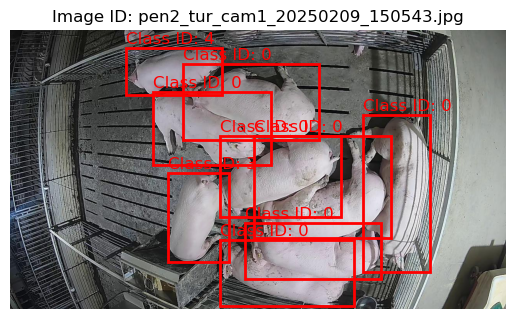

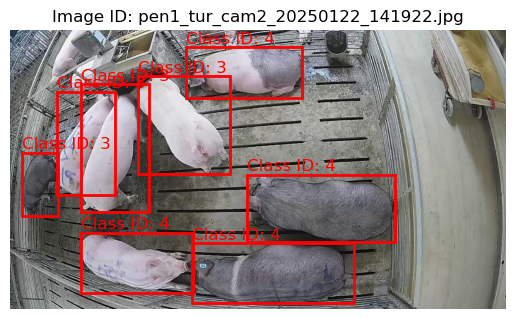

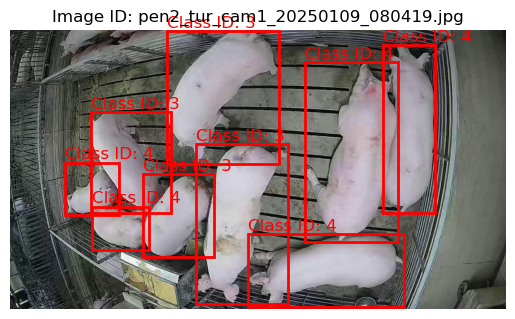

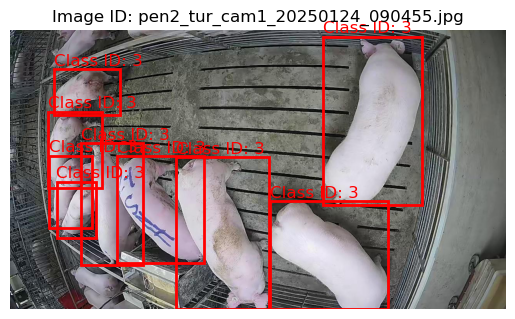

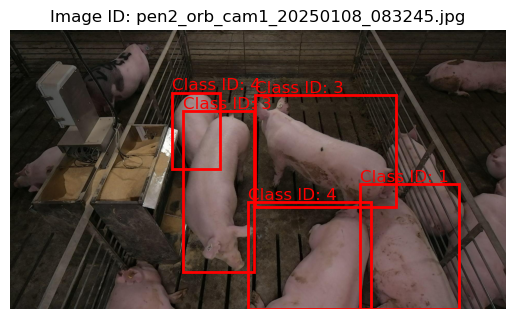

In [14]:
# show 5 random images from train1 or train 2with bounding boxes and class ids
def show_random_images_with_bboxes(df, images_path, num_images=5):
    random_images = df['image_id'].drop_duplicates().sample(num_images).values
    for image_id in random_images:
        image_path = os.path.join(images_path, image_id)
        image = Image.open(image_path)
        plt.imshow(image)
        plt.title(f"Image ID: {image_id}")
        plt.axis('off')
        
        # get bounding boxes and class ids for the image
        bboxes = df[df['image_id'] == image_id][['bbox', 'class_id']]
        
        for _, row in bboxes.iterrows():
            bbox = eval(row['bbox'])  # convert string to list
            class_id = row['class_id']
            x_min, y_min, width, height = bbox
            x_max = x_min + width
            y_max = y_min + height
            
            # draw bounding box
            plt.gca().add_patch(plt.Rectangle((x_min, y_min), width, height, 
                                              edgecolor='red', facecolor='none', linewidth=2))
            plt.text(x_min, y_min - 10, f"Class ID: {class_id}", color='red', fontsize=12)
        
        plt.show()
show_random_images_with_bboxes(train1_df, train1_images_path)
